<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Add your code below following the instructions given in the course to complete the peer graded assignment


## LIBRARIES AND DATAFRAMES

In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

boston_df=pd.read_csv(boston_url)

#Here i am creating the column "age_group" which determines if the age is either under 35, between 35 and 70, or over 70, as we're going to need this later.
boston_df["age_group"] = ['<=35' if AGE <= 35 else '>35&<=70' if AGE > 35 and AGE <= 70 else '>70' for AGE in boston_df["AGE"]]

##  TASK 2: PLOTS

#### BOXPLOT FOR THE MEDIAN VALUE OF OWNER-OCCUPIED HOMES

Text(0.5, 0, "MEDIAN VALUE OF OWNER-OCCUPIED HOMES IN $1000's")

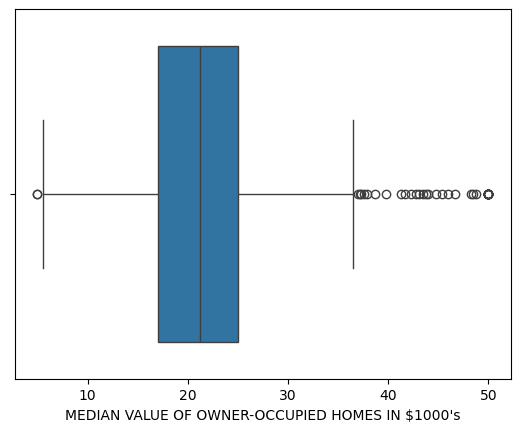

In [2]:
sns.boxplot(x = boston_df['MEDV'])
plt.xlabel("MEDIAN VALUE OF OWNER-OCCUPIED HOMES IN $1000's")

#### BARPLOT FOR THE CHARLES RIVER VARIABLE

Text(0, 0.5, 'VOLUME')

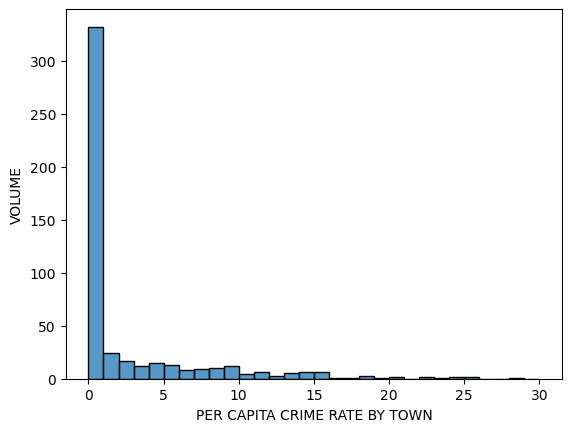

In [3]:
sns.histplot(data = boston_df['CRIM'], binwidth = 1, binrange = [0,30])
plt.xlabel("PER CAPITA CRIME RATE BY TOWN")
plt.ylabel("VOLUME")

#### BOXPLOT FOR THE MEDV VARIABLE VS THE AGE VARIABLE

Text(0, 0.5, '')

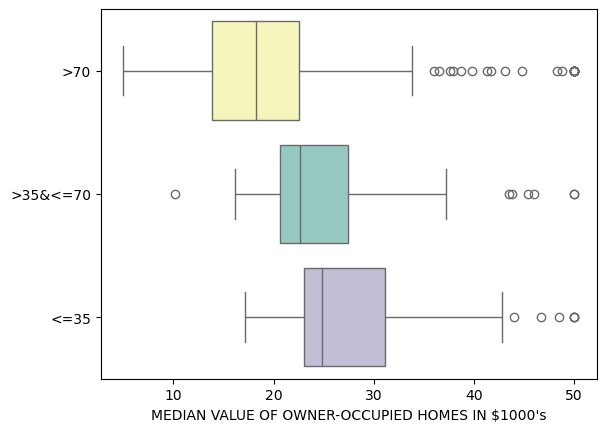

In [4]:
sns.boxplot(x = boston_df["MEDV"], y = boston_df["age_group"], hue = boston_df["age_group"], order = ['>70','>35&<=70','<=35'], palette="Set3")
plt.xlabel("MEDIAN VALUE OF OWNER-OCCUPIED HOMES IN $1000's")
plt.ylabel("")

#### SCATTERPLOT TO SHOW THE RELATIONSHIP BETWEEN NITRIC OXIDE CONCENTRATIONS AND THE PROPORTION OF NON-RETAIL BUSINESS ACRES PER TOWN

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

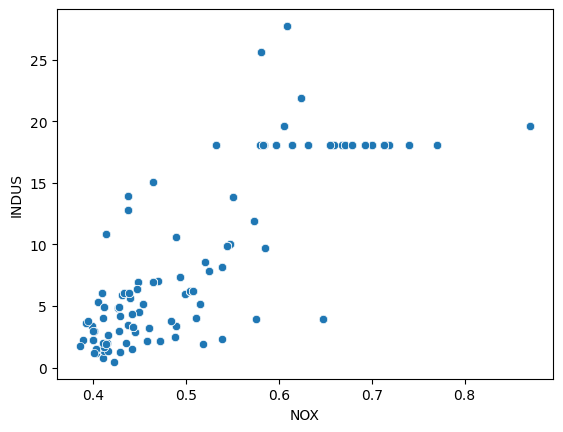

In [5]:
sns.scatterplot(x = boston_df["NOX"], y = boston_df["INDUS"])

#### HISTOGRAM FOR THE PUPIL TO TEACHER RATIO VARIABLE

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

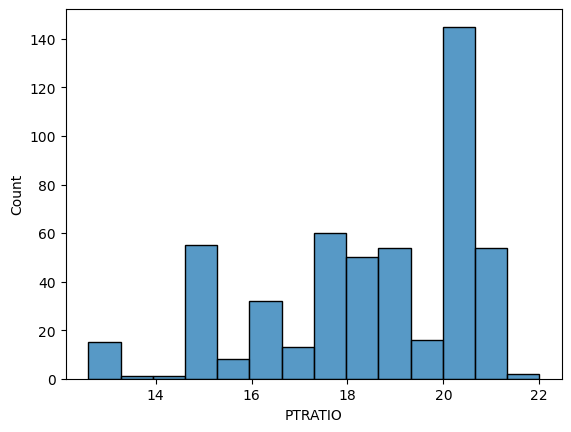

In [6]:
sns.histplot(x = boston_df["PTRATIO"])

## TASK 3: TESTS

#### T-TEST FOR INDEPENDENT SAMPLES

We want to know if there is a significant difference in median value of houses (**MEDV**) bounded by the Charles river (**CHAS**), so we will state our hypothesis as follows:
*   $H\_0: µ\_0 = µ\_1$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_0 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")

To start, Let's perform a **Levene's test** to check test significance:

In [7]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

As we can see, the **p-value is less than 0.05** and therefore the variances of both groups are **not equal**.

Let's use this information to perform a **T-test** assuming unequal variances:

In [8]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Our **p-value is less than 0.05**, so we can **reject** our null hypothesis and conclude that **there's a significant difference in median value of houses bounded by the Charles River**.

#### ANOVA

Now, we want to know if there's a difference in Median values of houses (**MEDV**) for each proportion of owner occupied units built prior to 1940 (**AGE**). 

For this task, let's use the column **"age_group"** we created on the "libraries and dataframes" section of this notebook to group the data into three groups.

we need to perform an Analysis of Variance, so let's establish our hypothesis:
* $H_0 : µ_0 = µ_1 = µ_2$ (i.e., the three population means are equal)
* $H_1 :$ at least one population mean is not equal

First, let's perform the test for equality of variance via a Levene's Test:

In [9]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '<=35']['MEDV'],
                   boston_df[boston_df['age_group'] == '>35&<=70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '>70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In this case, our **p-value is greater than 0.05**, and then the variances of the three groups are equal, so we can proceed with a one-way ANOVA test.

Let's separate the three samples into a different variable each:

In [10]:
under_35  = boston_df[boston_df['age_group'] == '<=35']['MEDV']
bet_35_70 = boston_df[boston_df['age_group'] == '>35&<=70']['MEDV']
over_70   = boston_df[boston_df['age_group'] == '>70']['MEDV']

Now, let's run a one-way ANOVA:

In [11]:
f_statistic, p_value = scipy.stats.f_oneway(under_35, bet_35_70, over_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

#### PEARSON CORRELATION

For this task we need to perform a pearson correlation between the Nitric Oxide Concentrations and the proportion of non-retail business acres per town.

Let's state our hypothesis:
* $H_0 :$ The concentration of nitric oxide is not correlated to the proportion of non-retail business acres per town
* $H_1 :$ The concentration of nitric oxide is correlated to the proportion of non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test:

In [12]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion :** Since p-value < 0.05, we can now reject the Null Hypothesis, and we can confidently conclude that we have enough evidence of a relationship between the nitric oxide concentration and the proportion of non-retail business acres per town.

#### REGRESSION ANALYSIS

We want to find the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes, so we're going to develope a regression analysis.

First, let establish our Hypothesis:

* $H_0 :$ there is no impact on the mean value of owner occupied homes.
* $H_1 :$ there is a significant impact on the mean value of owner occupied homes.

Let's run the model of the regression analysis to determine the correlation:

In [13]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y ,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        09:09:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion :** Because p-value < 0.05 we can say that there is a positive correlation between the distance to employment centres and the median value of homes.

We can see this in the next scatterplot:

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

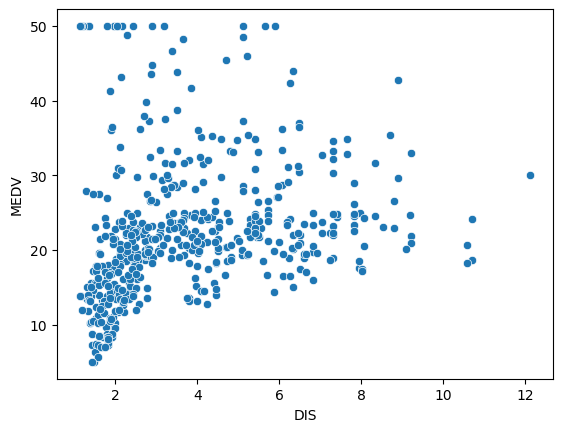

In [14]:
sns.scatterplot(x = boston_df['DIS'], y = boston_df['MEDV'])